DROPPING THIS APPROACH AS IT HAS LOT OF PARAMETERS TO TUNE

In [2]:
# pip install tensorflow


     -------------------------------------- 266.3/266.3 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 9.3 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.7 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 9.3 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 9.2 MB/s eta 0:00:00
     -------------------------------------- 177.0/177.0 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 781

In [48]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanSquaredError
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error

In [4]:
%run "featureSelection.ipynb"

----------------
               Columns        Score
31           sentiment  6773.682638
0   host_response_rate  6431.843258
29     amenities_count   263.548784
1    host_is_superhost   149.157935
26   reviews_per_month   120.950215
----------------
----------------
               Columns        Score
31           sentiment  5385.757684
0   host_response_rate  3450.414756
29     amenities_count   185.463246
1    host_is_superhost   119.675834
26   reviews_per_month    94.629085
----------------
----------------
               Columns        Score
0   host_response_rate  5711.801576
31           sentiment  4928.552034
29     amenities_count   258.664707
1    host_is_superhost   160.091961
26   reviews_per_month   157.658318
----------------
----------------
               Columns        Score
31           sentiment  4541.731696
0   host_response_rate  2455.297309
29     amenities_count   191.621710
----------------
----------------
                Columns        Score
31            sent

In [5]:
input_features = initial_X.copy()

In [8]:
# review_scores_rating = review_scores_rating_y.copy()
# review_scores_accuracy = review_scores_accuracy_y.copy()
# review_scores_cleanliness = review_scores_cleanliness_y.copy()
# review_scores_checkin = review_scores_checkin_y.copy()
# review_scores_communication = review_scores_communication_y.copy()
# review_scores_location = review_scores_location_y.copy()
# review_scores_value = review_scores_value_y.copy()

In [10]:
#Splitting the model into train, and test
from sklearn.model_selection import train_test_split
review_scores_rating_Xtrain, review_scores_rating_Xtest, review_scores_rating_ytrain, review_scores_rating_ytest = train_test_split(input_features,review_scores_rating_y)
review_scores_accuracy_Xtrain, review_scores_accuracy_Xtest, review_scores_accuracy_ytrain, review_scores_accuracy_ytest = train_test_split(input_features,review_scores_accuracy_y)
review_scores_cleanliness_Xtrain, review_scores_cleanliness_Xtest, review_scores_cleanliness_ytrain, review_scores_cleanliness_ytest = train_test_split(input_features,review_scores_cleanliness_y)
review_scores_checkin_Xtrain, review_scores_checkin_Xtest, review_scores_checkin_ytrain, review_scores_checkin_ytest = train_test_split(input_features,review_scores_checkin_y)
review_scores_communication_Xtrain, review_scores_communication_Xtest, review_scores_communication_ytrain, review_scores_communication_ytest = train_test_split(input_features,review_scores_communication_y)
review_scores_location_Xtrain, review_scores_location_Xtest, review_scores_location_ytrain, review_scores_location_ytest = train_test_split(input_features,review_scores_location_y)
review_scores_value_Xtrain, review_scores_value_Xtest, review_scores_value_ytrain, review_scores_value_ytest = train_test_split(input_features,review_scores_value_y)

In [11]:
def scaling_dataset(Xtrain, Xtest):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(Xtrain),index=Xtrain.index,columns=Xtrain.columns)
    x_test_scaled = pd.DataFrame(standard_scaler.transform(Xtest),index=Xtest.index,columns = Xtest.columns)
    return x_train_scaled, x_test_scaled

In [12]:
review_scores_rating_Xtrain_scaled, review_scores_rating_Xtest_scaled = scaling_dataset(review_scores_rating_Xtrain, review_scores_rating_Xtest)
review_scores_accuracy_Xtrain_scaled, review_scores_accuracy_Xtest_scaled = scaling_dataset(review_scores_accuracy_Xtrain, review_scores_accuracy_Xtest)
review_scores_cleanliness_Xtrain_scaled, review_scores_cleanliness_Xtest_scaled = scaling_dataset(review_scores_cleanliness_Xtrain, review_scores_cleanliness_Xtest)
review_scores_checkin_Xtrain_scaled, review_scores_checkin_Xtest_scaled = scaling_dataset(review_scores_checkin_Xtrain, review_scores_checkin_Xtest)
review_scores_communication_Xtrain_scaled, review_scores_communication_Xtest_scaled = scaling_dataset(review_scores_communication_Xtrain, review_scores_communication_Xtest)
review_scores_location_Xtrain_scaled, review_scores_location_Xtest_scaled = scaling_dataset(review_scores_location_Xtrain, review_scores_location_Xtest)
review_scores_value_Xtrain_scaled, review_scores_value_Xtest_scaled = scaling_dataset(review_scores_value_Xtrain, review_scores_value_Xtest)

In [61]:
review_scores_rating_Xtrain_scaled.shape

(5674, 32)

Epoch 1/25
71/71 [==============================] - 1s 6ms/step - loss: 3.6595 - mean_squared_error: 3.6560 - val_loss: 0.7280 - val_mean_squared_error: 0.7266
Epoch 2/25
71/71 [==============================] - 0s 4ms/step - loss: 0.6855 - mean_squared_error: 0.6852 - val_loss: 0.4855 - val_mean_squared_error: 0.4841
Epoch 3/25
71/71 [==============================] - 0s 5ms/step - loss: 0.4917 - mean_squared_error: 0.4916 - val_loss: 0.3690 - val_mean_squared_error: 0.3684
Epoch 4/25
71/71 [==============================] - 0s 5ms/step - loss: 0.4224 - mean_squared_error: 0.4224 - val_loss: 0.3178 - val_mean_squared_error: 0.3176
Epoch 5/25
71/71 [==============================] - 0s 5ms/step - loss: 0.3626 - mean_squared_error: 0.3625 - val_loss: 0.2675 - val_mean_squared_error: 0.2678
Epoch 6/25
71/71 [==============================] - 0s 5ms/step - loss: 0.3291 - mean_squared_error: 0.3291 - val_loss: 0.2335 - val_mean_squared_error: 0.2340
Epoch 7/25
71/71 [======================

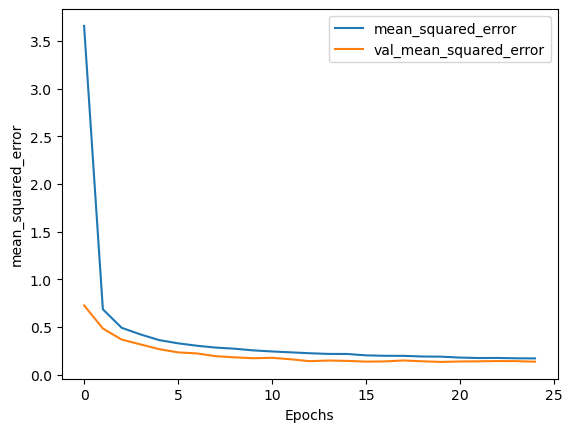

60/60 [==============================] - 0s 2ms/step
R2 accuracy score: 0.4951670103475123
MAE: 0.21156511137748213
MSE: 0.2354416168306868
RMSE: 0.48522326493139917


In [84]:
hidden_units1 = 160 #number of columns *5
hidden_units2 = 480 #previous layer *3
hidden_units3 = 240 #previous layer /2
hidden_units4 = 120 #previous layer /2
hidden_units5 = 60 #previous layer /2
learning_rate = 0.001

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.4),
    # Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    # Dropout(0.2),
    # Dense(hidden_units4, kernel_initializer='normal', activation='relu'),
    # Dropout(0.2),
    # Dense(hidden_units5, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

# build the model
model = build_model_using_sequential()

# loss function
mse = MeanSquaredError()
model.compile(
    loss=mse, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mse]
)

# train the model
history = model.fit(
    review_scores_rating_Xtrain_scaled.values, 
    review_scores_rating_ytrain.values, 
    epochs=25, 
    batch_size=64,
    validation_split=0.2
)


def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_error')

review_scores_rating_model_pred= model.predict(review_scores_rating_Xtest_scaled)
print('R2 accuracy score:',r2_score(review_scores_rating_ytest,review_scores_rating_model_pred))
print('MAE:',mean_absolute_error(review_scores_rating_ytest,review_scores_rating_model_pred))
print('MSE:',mean_squared_error(review_scores_rating_ytest,review_scores_rating_model_pred))
print('RMSE:',mean_squared_error(review_scores_rating_ytest,review_scores_rating_model_pred,squared=False))


ref:
1) <<https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/>>
2) <<https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/>>